In [15]:
import pandas as pd
import numpy as np

df  = pd.read_json('../data/Sarcasm_Headlines_Dataset.json', lines=True)
df2 = pd.read_json('../data/Sarcasm_Headlines_Dataset_v2.json', lines=True)

df = pd.concat([df, df2])
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55328 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

# Data visualisation
Boxplot

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,7)


In [19]:
df['sito'] = df.article_link.apply(lambda x: x.split('/')[2].split('.')[1])
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sito'] = le.fit_transform(df['sito'])

le.classes_

array(['huffingtonpost', 'theonion'], dtype=object)

theonion è un sito di articoli sarcastici, huffingtonpost al contrario non lo è.

In [20]:
(df.is_sarcastic == df.sito).all()

True

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re, string

In [22]:
sw = stopwords.words('english')
sw.remove('not')
lemm = WordNetLemmatizer()

def text_cleaning(x):
    
    x = x.lower()
    x = re.sub('\s+\n+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = x.split()
    
    x = [lemm.lemmatize(word, "v") for word in x if not word in sw]
    x = ' '.join(x)
    
    return x

In [23]:
df['text_clean'] = df.headline.apply(lambda x: text_cleaning(x))
df['sentence_length'] = df.text_clean.apply(lambda x: len(x.split()))
df.head()

,article_link,headline,is_sarcastic,sito,text_clean,sentence_length
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,0,former versace store clerk sue secret black co...,10
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,0,roseanne revival catch thorny political mood b...,8
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,1,mom start fear son web series closest thing gr...,9
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,1,boehner want wife listen not come alternative ...,10
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,0,j k rowling wish snape happy birthday magical way,9


Elimino l'outlier tramite la funzione ```drop()```

In [24]:
df.drop(df[df.sentence_length > 70].index, axis = 0, inplace=True) # 
# plt.hist(df[df.is_sarcastic == 1].sentence_length)
# plt.show()

In [25]:
# plt.hist(df[df.is_sarcastic == 0].sentence_length)
# plt.show()

ValueError: cannot reindex from a duplicate axis

<Figure size 1280x640 with 0 Axes>

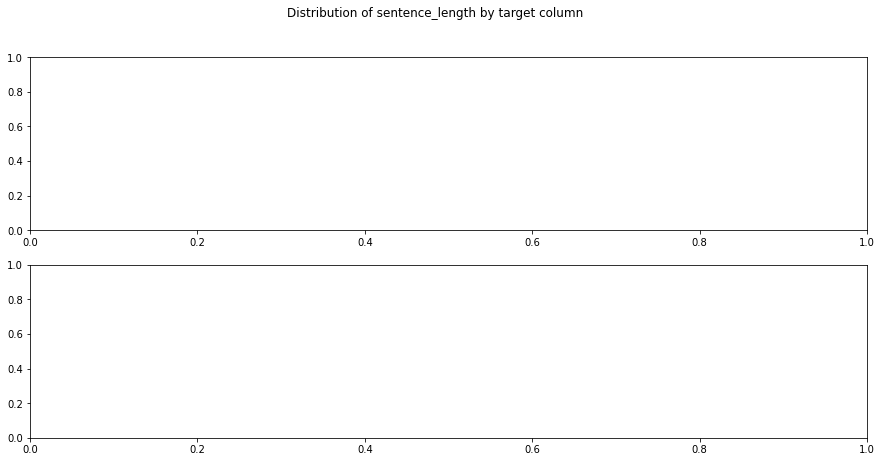

In [26]:
# Draw Plot
plt.figure(figsize=(16,8), dpi= 80)
fig, axes = plt.subplots(2, 1)
fig.suptitle('Distribution of sentence_length by target column')
sns.kdeplot(df.loc[df['is_sarcastic'] == 0, "sentence_length"], ax=axes[0], shade=True, color="r", label="Not sarcastic", alpha=.7)
sns.kdeplot(df.loc[df['is_sarcastic'] == 1, "sentence_length"], ax=axes[1], shade=True, color="g", label="Sarcastic", alpha=.7)


In [27]:
df = df[['headline', 'text_clean','sentence_length','is_sarcastic']]
df.head()

,headline,text_clean,sentence_length,is_sarcastic
0,former versace store clerk sues over secret 'b...,former versace store clerk sue secret black co...,10,0
1,the 'roseanne' revival catches up to our thorn...,roseanne revival catch thorny political mood b...,8,0
2,mom starting to fear son's web series closest ...,mom start fear son web series closest thing gr...,9,1
3,"boehner just wants wife to listen, not come up...",boehner want wife listen not come alternative ...,10,1
4,j.k. rowling wishes snape happy birthday in th...,j k rowling wish snape happy birthday magical way,9,0


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

tfidf = CountVectorizer(tokenizer=word_tokenize, min_df=10, max_df=0.60, dtype=np.int32)
X = tfidf.fit_transform(df.text_clean)

X_df = pd.DataFrame(X.todense(), columns=sorted(tfidf.vocabulary_))
X_df.head()

,0,000,1,10,100,10th,11,12,120,13,...,youths,youtube,z,zero,zika,zimmerman,zip,zone,zoo,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.reset_index(inplace=True, drop=True)
X_df.reset_index(inplace=True, drop=True)

df2 = pd.concat([df, X_df], axis = 1)
df2.head()

,headline,text_clean,sentence_length,is_sarcastic,0,000,1,10,100,10th,...,youths,youtube,z,zero,zika,zimmerman,zip,zone,zoo,zuckerberg
0,former versace store clerk sues over secret 'b...,former versace store clerk sue secret black co...,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,the 'roseanne' revival catches up to our thorn...,roseanne revival catch thorny political mood b...,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mom starting to fear son's web series closest ...,mom start fear son web series closest thing gr...,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"boehner just wants wife to listen, not come up...",boehner want wife listen not come alternative ...,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,j.k. rowling wishes snape happy birthday in th...,j k rowling wish snape happy birthday magical way,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

X = df2.loc[:, df2.columns != 'is_sarcastic'].iloc[:, 2:]
y = df2.loc[:, 'is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [32]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train['sentence_length'] = mms.fit_transform(X_train.sentence_length.to_numpy().reshape(-1, 1))

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

X_test.sentence_length = mms.transform(X_test.sentence_length.to_numpy().reshape(-1, 1))
pred = model.predict(X_test)


0.9181728557344726

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

X_test.sentence_length = mms.transform(X_test.sentence_length.to_numpy().reshape(-1, 1))

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8423704677401687

<AxesSubplot:>

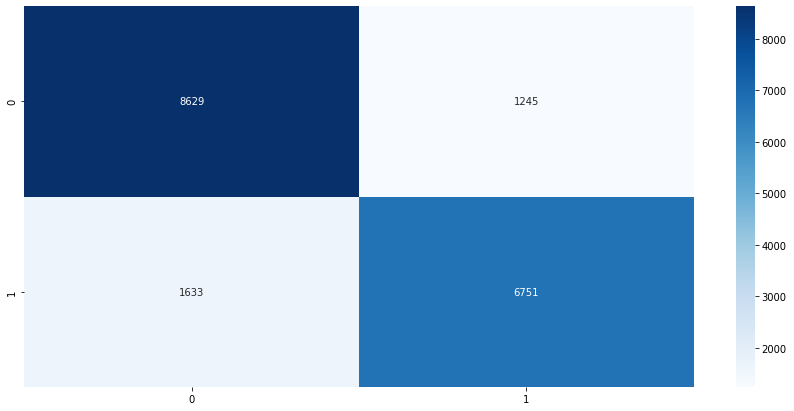

In [54]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, 
             annot=True, fmt='', cmap='Blues')
# cf_matrix.sum(axis=0).reshape(-1, 1)

In [41]:
print("Best score: {}".format(clf.best_score_))
print("Best parameter: {}".format(clf.best_params_))
LogisticRegression

Best score: 0.8373260347865472
Best parameter: {'C': 10}


In [52]:
# save the model
import pickle
path = '..\\model\\'
filename = 'sarcasm_lr.sav'
with open(path+filename, 'wb') as f:
    pickle.dump(model, f)